In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)
import seaborn as sns 

In [5]:
# Confusion Matrix

"""
                                Actual
           --------------------------------------------------
           |            1           |       0               |
           --------------------------------------------------
           | 1  | True Positive(TP)     False Positive(FP)  |
Predicted  |----| ----------------------------------------- |
           | 0  | False Negative(FN)    True Negative(TN)   |
           --------------------------------------------------

"""

In [ ]:
"""

    [[73 , 7]
     [4 , 144]]

"""

# Accuracy = ( TP + TN ) / (TP + FP + FN + TN ) = 217 / 228

# Precision = TP / (TP + FP) = 73 / 80

# Recall = TP / (TP + FN) = 73 / 77

In [6]:
# Support Vector Machines

dataset = pd.read_csv("../../Data/Social_Network_Ads.csv")

X = dataset.iloc[: , [2,3]].values
y = dataset.iloc[: , -1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [9]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear' , random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred)
cm

array([[63,  5],
       [ 7, 25]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


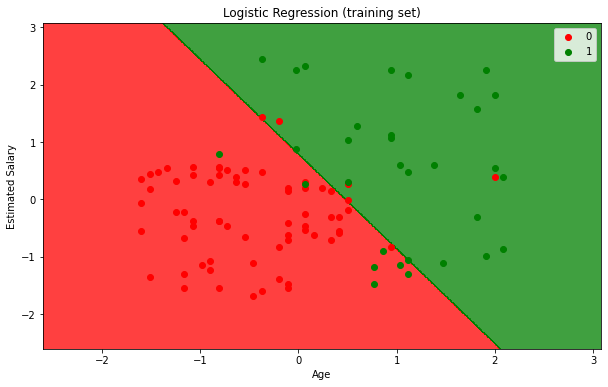

In [13]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Logistic Regression (training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()